In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

random_seed = 616

In [12]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')

In [13]:
print(train_values.info())

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

In [14]:
print(train_labels.info())

<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   damage_grade  260601 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB
None


In [15]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

In [16]:
train_values.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [17]:
features1 = ['geo_level_1_id', 
            'geo_level_2_id', 
            'geo_level_3_id',
            'count_floors_pre_eq', 
            'age', 
            'area_percentage', 
            'height_percentage',
            ]

features2 = [ 
            'has_superstructure_adobe_mud',
            'has_superstructure_mud_mortar_stone', 
            'has_superstructure_stone_flag',
            'has_superstructure_cement_mortar_stone',
            'has_superstructure_mud_mortar_brick',
            'has_superstructure_cement_mortar_brick', 
            'has_superstructure_timber',
            'has_superstructure_bamboo', 
            'has_superstructure_rc_non_engineered',
            'has_superstructure_rc_engineered', 
            'has_superstructure_other']
features3 = ['legal_ownership_status', 
            'count_families', 
            'has_secondary_use',
            'has_secondary_use_agriculture', 
            'has_secondary_use_hotel',
            'has_secondary_use_rental', 
            'has_secondary_use_institution',
            'has_secondary_use_school', 
            'has_secondary_use_industry',
            'has_secondary_use_health_post', 
            'has_secondary_use_gov_office',
            'has_secondary_use_use_police', 
            'has_secondary_use_other']

In [18]:
train_values_subset1 = train_values[features1]
train_values_subset2 = train_values[features2]
train_values_subset3 = train_values[features3]

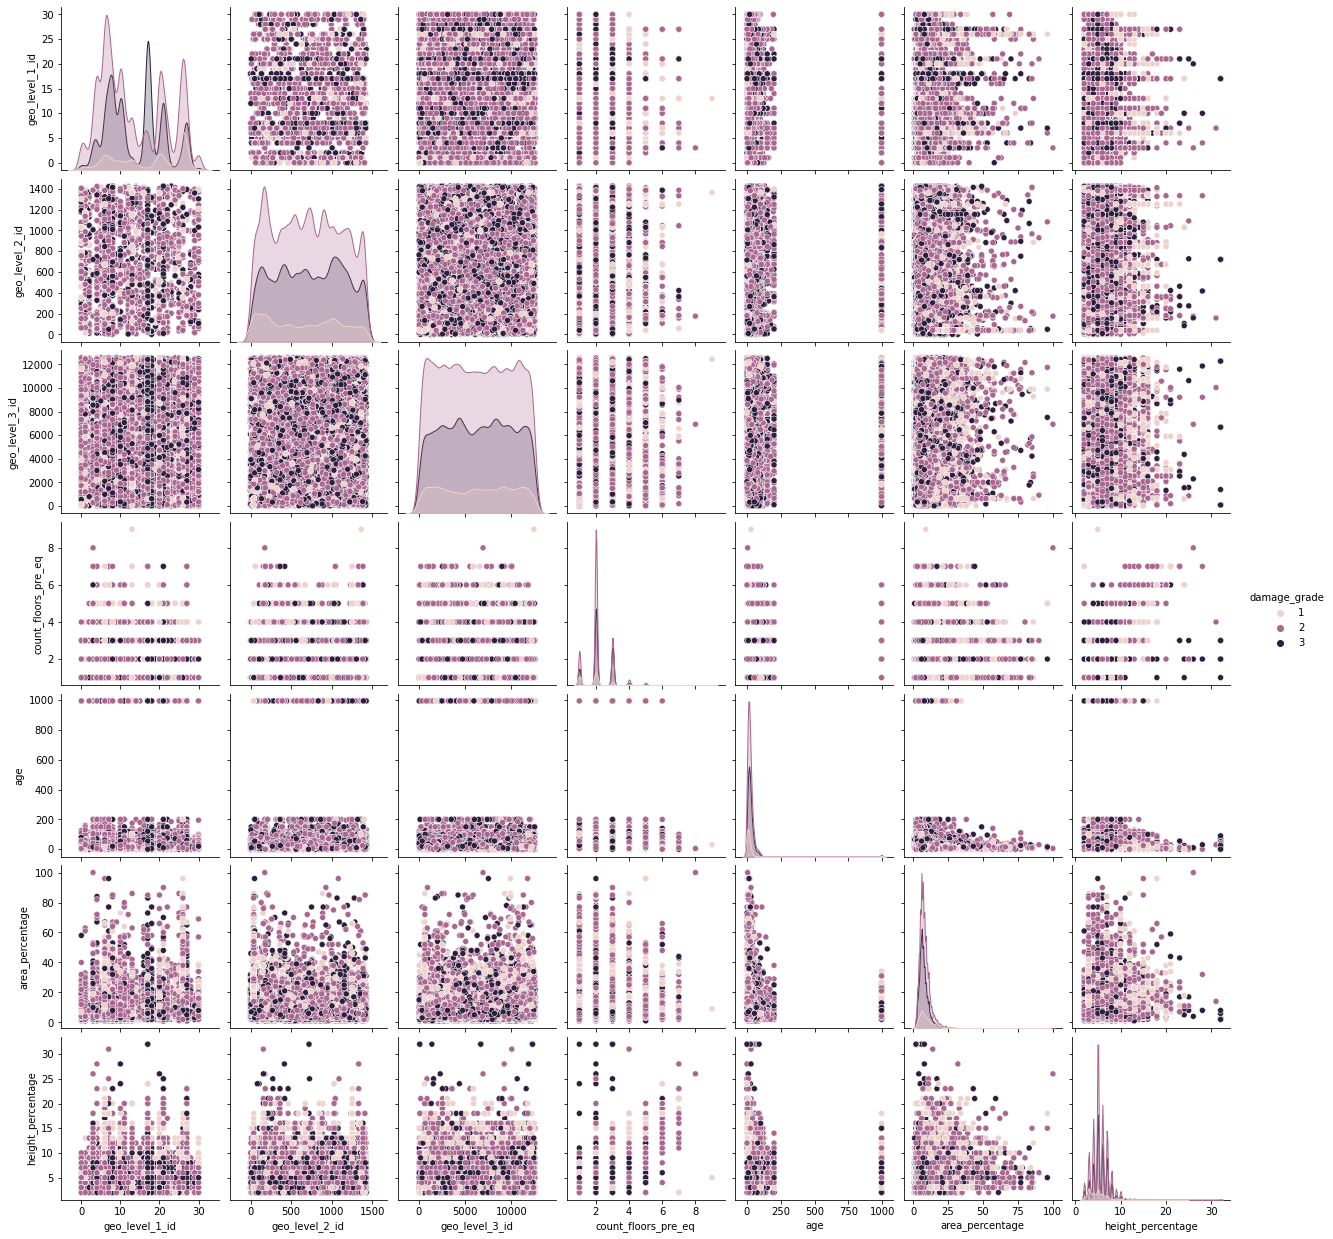

In [19]:
sns.pairplot(train_values_subset1.join(train_labels), 
             hue='damage_grade')

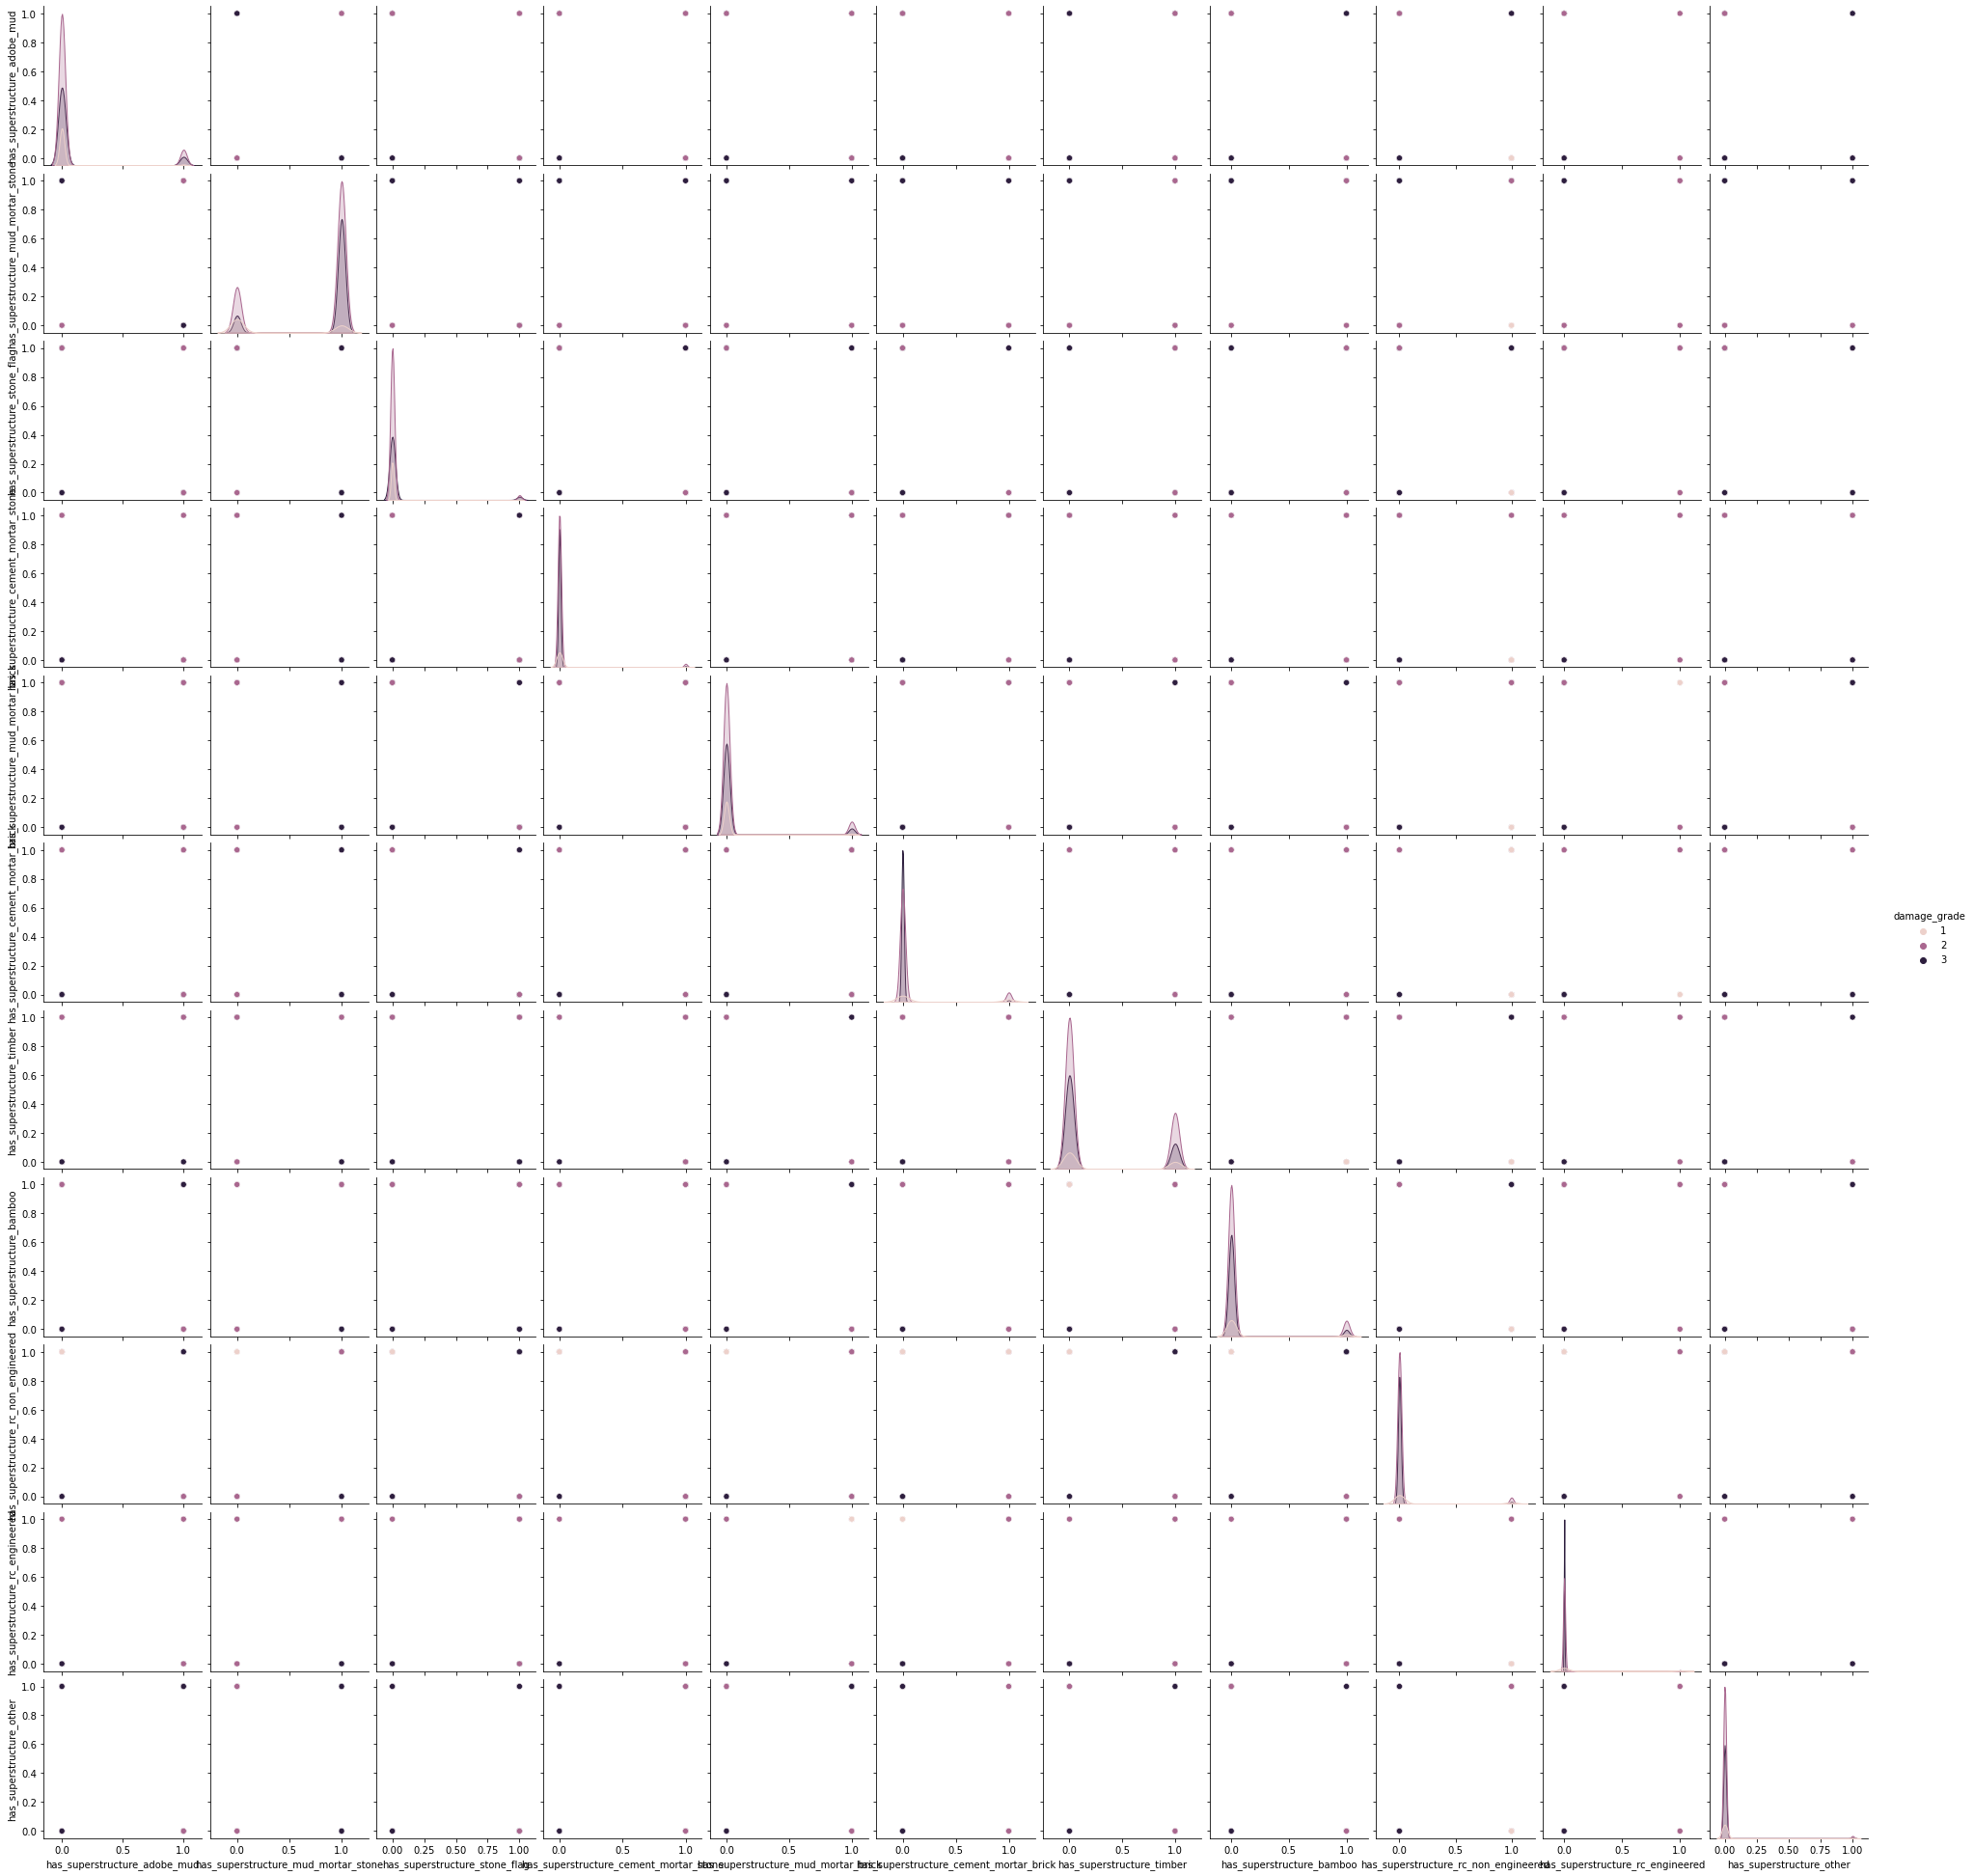

In [20]:
sns.pairplot(train_values_subset2.join(train_labels), 
             hue='damage_grade')

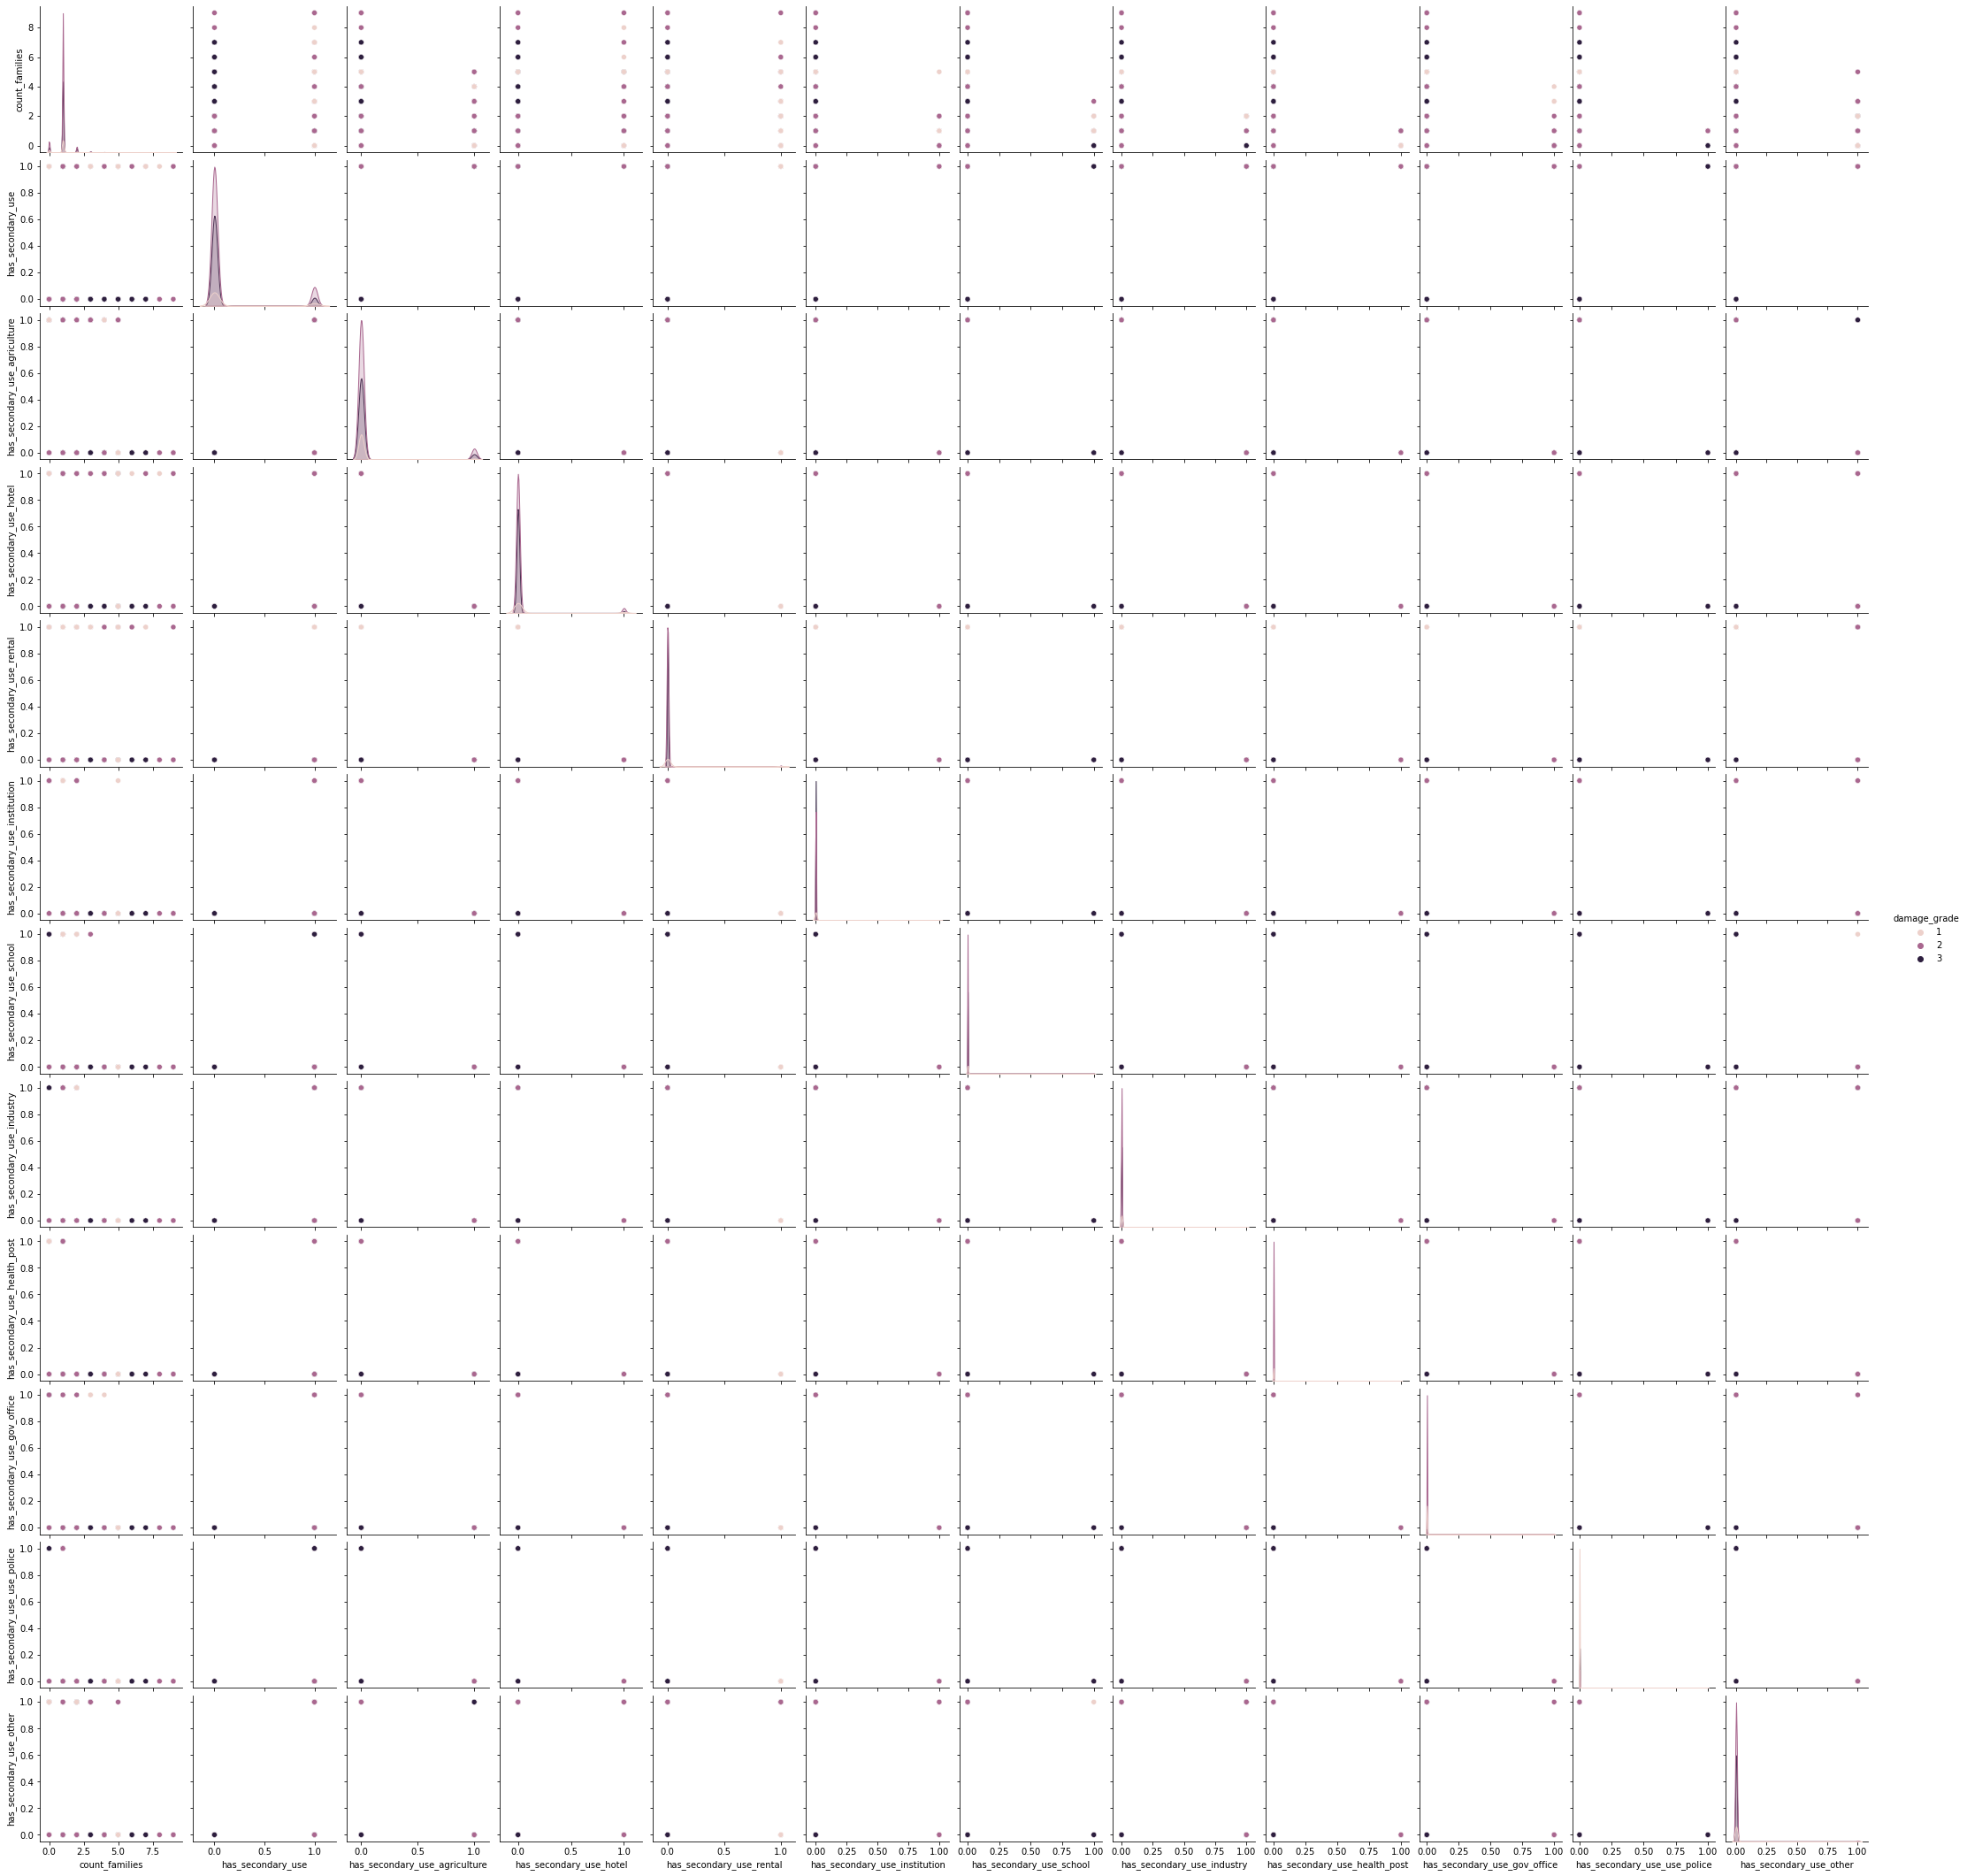

In [10]:
sns.pairplot(train_values_subset3.join(train_labels), 
             hue='damage_grade')

<Axes: title={'center': 'Number of Buildings with Each Damage Grade'}, xlabel='damage_grade'>

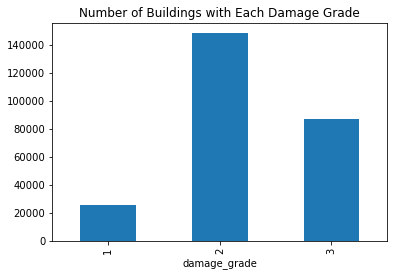

In [21]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

In [22]:
# Merge data_train with data_label
merged_data = pd.merge(train_values, train_labels, on='building_id', how='left')
print(merged_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-null 

Pearson's correlation coefficient: 0.7727343845138255


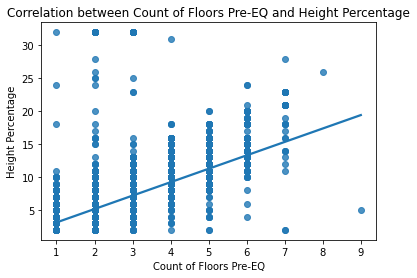

In [30]:

correlation = merged_data['count_floors_pre_eq'].corr(merged_data['height_percentage'])
print("Pearson's correlation coefficient:", correlation)

# Scatter plot with regression line
sns.regplot(x='count_floors_pre_eq', y='height_percentage', data=merged_data)
plt.title('Correlation between Count of Floors Pre-EQ and Height Percentage')
plt.xlabel('Count of Floors Pre-EQ')
plt.ylabel('Height Percentage')

plt.show()


In [23]:
print(merged_data.head())
# Check for any duplicated indices
print(merged_data.index.duplicated().sum())


             geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
802906                    6             487           12198   
28830                     8             900            2812   
94947                    21             363            8973   
590882                   22             418           10694   
201944                   11             131            1488   

             count_floors_pre_eq  age  area_percentage  height_percentage  \
building_id                                                                 
802906                         2   30                6                  5   
28830                          2   10                8                  7   
94947                          2   10                5                  5   
590882                         2   10                6                  5   
201944                         3   30                8                  9   

            land_s

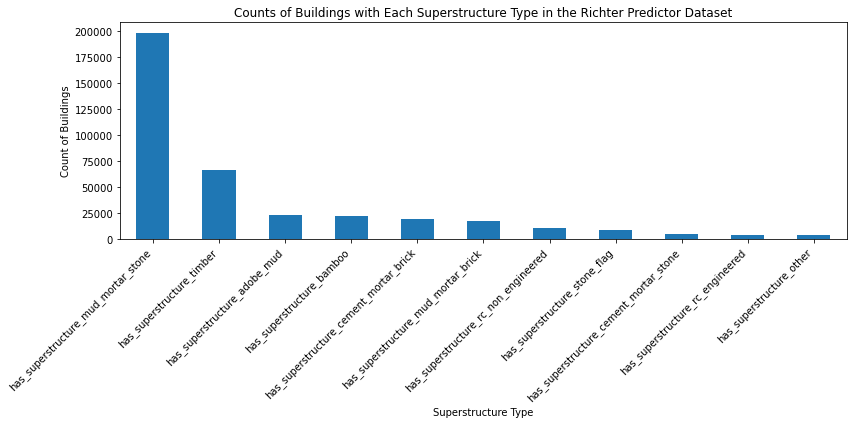

In [32]:

superstructure_columns = [col for col in merged_data.columns if 'has_superstructure' in col]

counts = merged_data[superstructure_columns].sum().sort_values(ascending=False)

# Plot the counts using a bar chart.
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Counts of Buildings with Each Superstructure Type in the Richter Predictor Dataset')
plt.xlabel('Superstructure Type')
plt.ylabel('Count of Buildings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


In [24]:
# Start with a small list of features
selected_features = [
    'geo_level_1_id', 
    'age', 'count_floors_pre_eq', 'area_percentage', 
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 
    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 
    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 
    'has_superstructure_timber', 'has_superstructure_bamboo', 
    'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 
    'has_superstructure_other',
    'damage_grade'
]

data_small = merged_data[selected_features]


In [25]:
data_small.head()

,geo_level_1_id,age,count_floors_pre_eq,area_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
building_id,,,,,,,,,,,,,,,,
802906,6,30,2,6,1,1,0,0,0,0,0,0,0,0,0,3
28830,8,10,2,8,0,1,0,0,0,0,0,0,0,0,0,2
94947,21,10,2,5,0,1,0,0,0,0,0,0,0,0,0,3
590882,22,10,2,6,0,1,0,0,0,0,1,1,0,0,0,2
201944,11,30,3,8,1,0,0,0,0,0,0,0,0,0,0,3


In [26]:
data_small.isnull().sum()

geo_level_1_id                            0
age                                       0
count_floors_pre_eq                       0
area_percentage                           0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engineered      0
has_superstructure_rc_engineered          0
has_superstructure_other                  0
damage_grade                              0
dtype: int64

In [27]:
data_small.describe()

,geo_level_1_id,age,count_floors_pre_eq,area_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,26.535029,2.129723,8.018051,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,2.238272
std,8.033617,73.565937,0.727665,4.392231,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.611814
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,10.000000,2.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,15.000000,2.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,30.000000,2.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,995.000000,9.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## Age and area_percentage look like they might have outliers.

In [16]:
age_threshold = data_small['age'].quantile(0.99)  
area_percentage_threshold = data_small['area_percentage'].quantile(0.99)

# number of outliers
age_outliers = data_small[data_small['age'] > age_threshold].shape[0]
area_percentage_outliers = data_small[data_small['area_percentage'] > area_percentage_threshold].shape[0]

print(f"Number of age outliers: {age_outliers}")
print(f"Number of area percentage outliers: {area_percentage_outliers}")


Number of age outliers: 2124
Number of area percentage outliers: 2589


In [18]:
data_small.head()

,geo_level_1_id,age,count_floors_pre_eq,area_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,combined_damage_grade
building_id,,,,,,,,,,,,,,,,,
802906,6,30,2,6,1,1,0,0,0,0,0,0,0,0,0,3,2
28830,8,10,2,8,0,1,0,0,0,0,0,0,0,0,0,2,2
94947,21,10,2,5,0,1,0,0,0,0,0,0,0,0,0,3,2
590882,22,10,2,6,0,1,0,0,0,0,1,1,0,0,0,2,2
201944,11,30,3,8,1,0,0,0,0,0,0,0,0,0,0,3,2


In [ ]:
# for binary model
code to make Bayesian confusion matrix

# Generate posterior predictive checks
ppc = 
# For each class, calculate the probability distributions for TP, FP, TN, FN

tp_distribution = np.mean((ppc == 1) & (y_test == 1), axis=0)
fp_distribution = np.mean((ppc == 1) & (y_test == 0), axis=0)
tn_distribution = np.mean((ppc == 0) & (y_test == 0), axis=0)
fn_distribution = np.mean((ppc == 0) & (y_test == 1), axis=0)
